In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [94]:
x = np.random.normal(1,scale=1, size=1000)
y = 2 * x + np.random.normal(1,scale=1, size=1000)
z = 2*x**2

In [102]:
X_nc = np.vstack([x,y,z])
X = (X_nc - np.mean(X_nc, axis=1, keepdims=True))/np.std(X_nc, axis=1, keepdims=True)

In [103]:
CX = np.cov(X)

In [104]:
eigenvalues, eigenvectors = np.linalg.eig(CX)

In [105]:
Y = eigenvectors.T @ X  # Shape: (2, 1000)

In [ ]:
# Sort eigenvalues and eigenvectors in descending order 
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Print total variance and explained variance by each component
total_variance = np.sum(eigenvalues)
explained_variance_ratio = eigenvalues / total_variance

for i, (var, ratio) in enumerate(zip(eigenvalues, explained_variance_ratio)):
    print(f"Principal Component {i+1}: Variance = {var:.3f}, Explained Variance Ratio = {ratio:.2%}")


Principal Component 1: Variance = 2.649, Explained Variance Ratio = 88.22%
Principal Component 2: Variance = 0.267, Explained Variance Ratio = 8.88%
Principal Component 3: Variance = 0.087, Explained Variance Ratio = 2.89%


In [107]:
def plot_scatter_matrix(data, title_prefix=""):
    dim = data.shape[0]
    fig, axes = plt.subplots(dim, dim, figsize=(4 * dim, 4 * dim))

    for i in range(dim):
        for j in range(dim):
            ax = axes[i, j] if dim > 1 else axes
            ax.scatter(data[j], data[i], marker='.', alpha=0.5)
            if i == dim - 1:
                ax.set_xlabel(f'{title_prefix}[{j}]')
            if j == 0:
                ax.set_ylabel(f'{title_prefix}[{i}]')
            ax.set_title(f'{title_prefix}[{i}] vs {title_prefix}[{j}]')
            ax.grid(True)

    plt.tight_layout()
    plt.show()

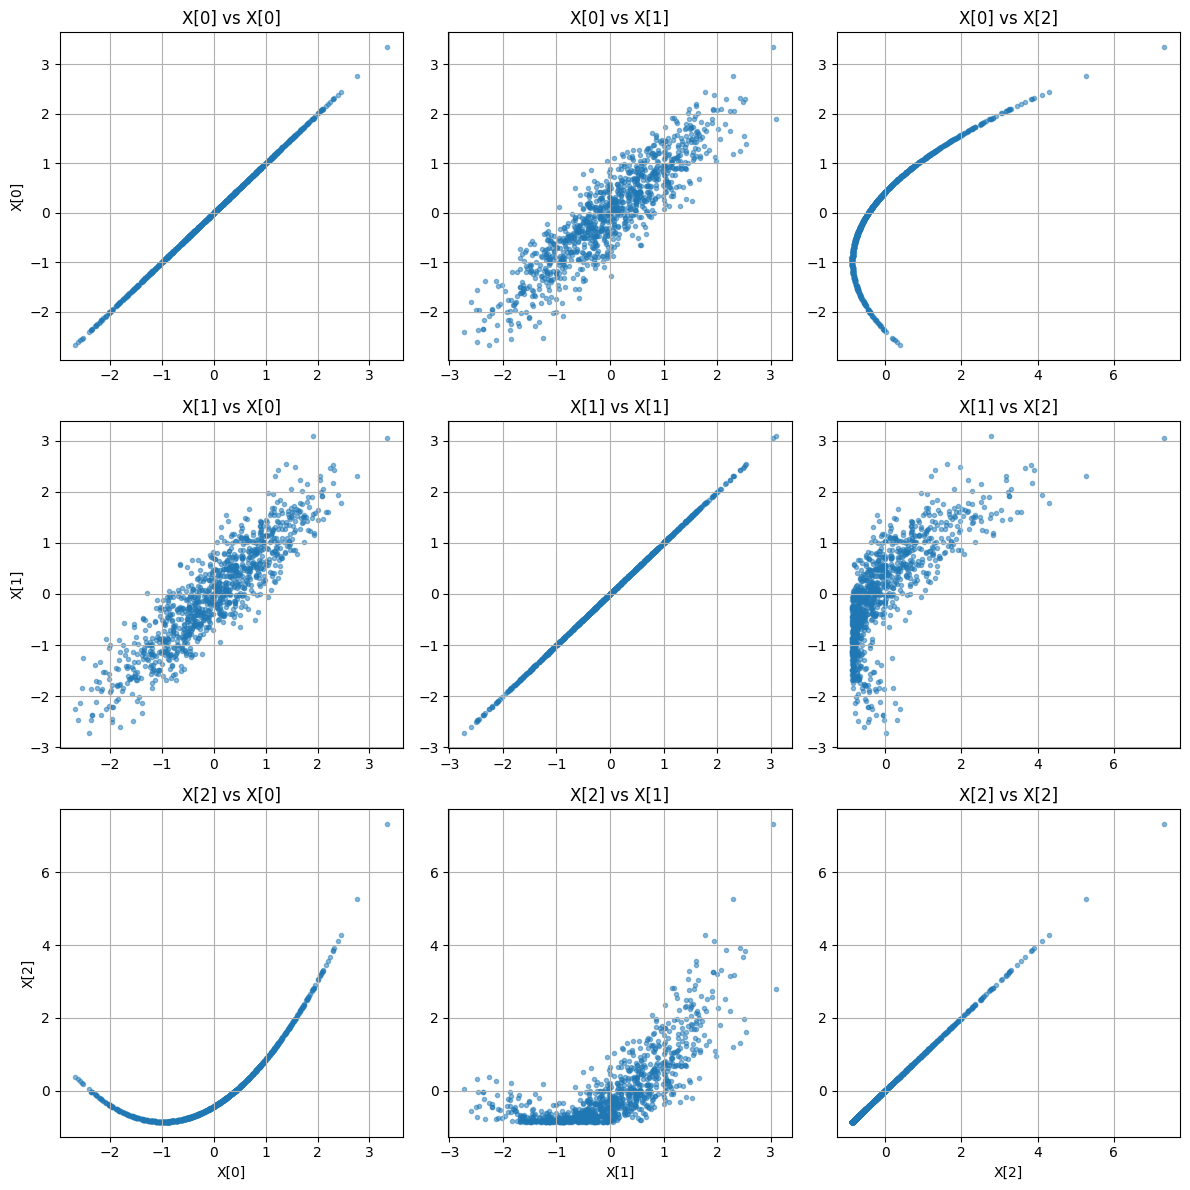

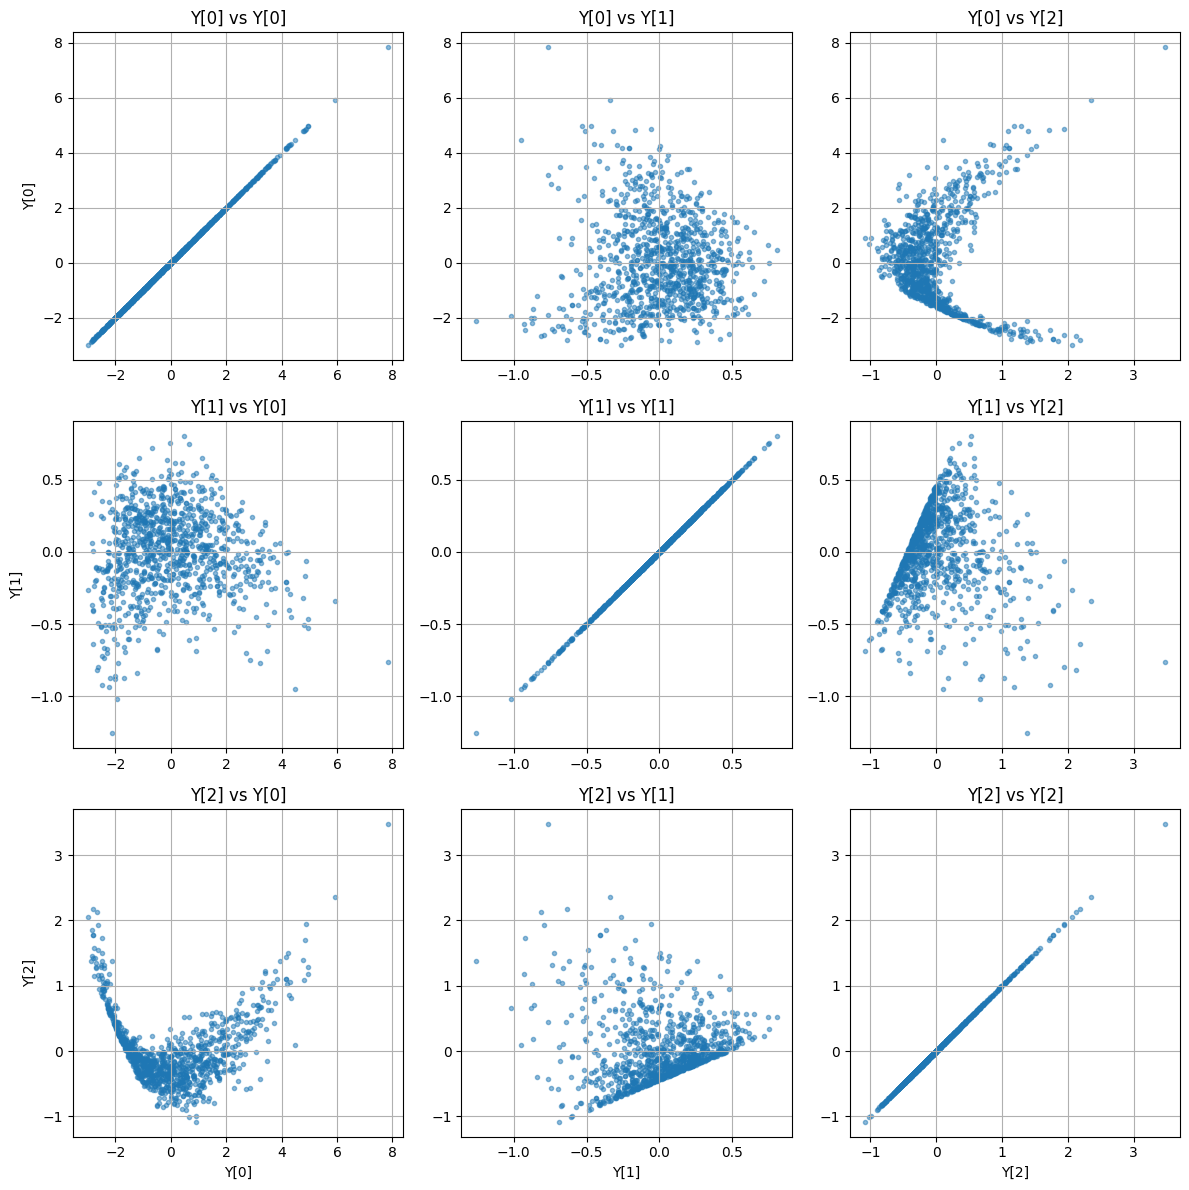

In [108]:
plot_scatter_matrix(X, title_prefix="X")
plot_scatter_matrix(Y, title_prefix="Y")